# K-최근접 이웃 회귀 (K-Nearest Neighbors)

- knn은 지도학습
- 지도학습, 정답의 유무

- 정답이 없기 때문에 이웃에 대한 라벨을 정할 때 정답이 아닌 실루엣, 엘보우 같은 지표 사용해서 최적의 k를 찾음

- 회귀 지도학습 -> 정답이 있다.
- 정답에 값을 가지고 k개수를 찾아볼 수 있다.

- knn 이웃에 접근하는 방법만 같지 회귀와 분류로 나눠진다.
- knn 회귀 (Regression) , 분류도 있다. 


- 원리를 살펴보면?
- 거리기반의 가장 가까운 k개의 이웃을 찾고 근처 k개의 정답의 평균을 계산해서 예측

- 영화평점 데이터에서 가장 가까운 영화 3개가 있는데 평점이 5.0, 6.8, 9.2의 등급을 가졌다면 해당 값은 3개의 평균인 7.0이라고 예측 

- 3개 영화를 k군집으로 잡았는데, 해당 3개 영화 중 더 가까운 데이터가 있을 것

- 단순하게 평균으로만 잡게되면 가중치를 놓칠 수가 있다
- 해당 3개 영화의 데이터에 거리까지 입력하여 평점을 예측한다.
- 가중평균을 이용해서 거리가 가까울수록 데이터가 더 유사할 것이라 보고 가중치 부여


ex)
a영화 : 평점 5.0 / x까지 거리 3.2
b영화 : 평점 6.8 / x까지 거리 10.5
c영화 : 평점 9.2 / x까지 거리 1.1
    
단순 평균 계산인 경우는 예측값이 7.0이지만
거리기반으로 만약 계산해본다면? 가중평균 다른 값이 나온다


In [1]:
(5.0 + 6.8 + 9.2 )/3

7.0

In [2]:
(5.0/3.2 + 6.8/10.5 + 9.2/1.1) / (1/3.2 + 1/10.5 + 1/1.1)

8.02971029381549

In [3]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

In [4]:
x1=np.arange(1,11)
x = x1.reshape(-1, 1)
y=np.arange(1,11)*5

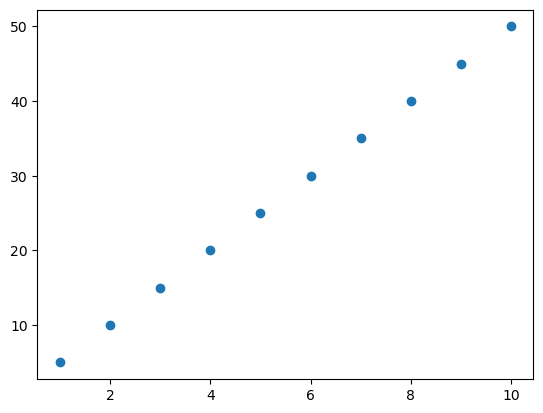

In [5]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x,y)
plt.show()

In [7]:
knn_model = KNeighborsRegressor(n_neighbors=2).fit(x,y)

In [9]:
print(knn_model.predict([[3]]))

[12.5]


In [10]:
#x값과 가까운 두 값의 평균

(10+15)/2

12.5

In [8]:
knn_model

KNeighborsRegressor(n_neighbors=2)

In [12]:
print(knn_model.predict([[3]]))
#2와 3의 값의 평균

[12.5]


- knn 단점, 한계

In [14]:
print(knn_model.predict([[10]]))

[47.5]


In [15]:
print(knn_model.predict([[15]]))

[47.5]


In [16]:
print(knn_model.predict([[30]]))

[47.5]


- 거리기반이다보니 기존에 나타난 데이터에서 벗어난 범위는 정확하게 예측하기 어렵다.

In [43]:
x1=np.arange(1,11)
x = x1.reshape(-1, 1)
y=np.arange(1,11)*5

In [52]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [54]:
# 가중평균을 주고 데이터 값을 예측해보자!

knn_model = KNeighborsRegressor(n_neighbors = 2, weights = 'distance').fit(x,y)

In [62]:
y

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

In [56]:
print(knn_model.predict([[3]]))
#같은 코드인데 제 컴퓨터에선 안되네요 ...

AttributeError: 'list' object has no attribute 'shape'

- weights='uniform' 거리기반 파라미터 {'uniform' 디폴트값, 'distance' 거리기반}, 사용자함수로 거리를 만들 수 있다.

- algorithm = 'auto', Brute Force, K-DTree, Ball Tree 등이 있다.

- p 값 
- 민코프스키 거리를 가지고 차수를 증가해서 p1 민코프스키, p2 유클리디안 p값이 올라갈수록 쳬비셰프거리

- 거리를 어떤 식으로 측정하냐에 따라서 달라질 수 있다.

In [64]:
from sklearn.datasets import load_boston 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd


In [75]:
boston = load_boston()

data = pd.DataFrame(boston['data'], columns = boston['feature_names'])
target = pd.DataFrame(boston['target'], columns = ['target'])

df = pd.concat([data,target], axis=1)
df

C:\Users\gram\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [92]:
X_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2)

In [93]:
X_train

array([[3.69200e-01, 0.00000e+00, 9.90000e+00, ..., 1.84000e+01,
        3.95690e+02, 9.28000e+00],
       [2.90900e-01, 0.00000e+00, 2.18900e+01, ..., 2.12000e+01,
        3.88080e+02, 2.41600e+01],
       [6.26300e-02, 0.00000e+00, 1.19300e+01, ..., 2.10000e+01,
        3.91990e+02, 9.67000e+00],
       ...,
       [4.68400e-02, 0.00000e+00, 3.41000e+00, ..., 1.78000e+01,
        3.92180e+02, 8.81000e+00],
       [5.73116e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.95280e+02, 7.01000e+00],
       [6.63510e-01, 2.00000e+01, 3.97000e+00, ..., 1.30000e+01,
        3.83290e+02, 7.79000e+00]])

# 회귀이기 때문에 정답에 대해서 평가하는 방법이 RMSE
- k값의 변화에 따라 어떤 식으로 값이 달라지는지 확인해보자

In [79]:
from sklearn import neighbors

In [94]:
rmse_val =[]
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value k',K,'=',error)

#왜 안달라지지

RMSE value k 1 = 6.991858009955047
RMSE value k 2 = 7.158164130940991
RMSE value k 3 = 6.188192425110589
RMSE value k 4 = 5.928778682550619
RMSE value k 5 = 5.988332773966784
RMSE value k 6 = 6.093694060130928
RMSE value k 7 = 6.217044527511671
RMSE value k 8 = 6.323640552773875
RMSE value k 9 = 6.32039528148052
RMSE value k 10 = 6.4458719880458775
RMSE value k 11 = 6.3121957690646155
RMSE value k 12 = 6.354703047113489
RMSE value k 13 = 6.3223418614700195
RMSE value k 14 = 6.500717670541679
RMSE value k 15 = 6.4931656042542265
RMSE value k 16 = 6.511167348878236
RMSE value k 17 = 6.54000929838064
RMSE value k 18 = 6.5686434656586234
RMSE value k 19 = 6.5521904394342885
RMSE value k 20 = 6.548823704434615


In [95]:
rmse_val=[]

for K in range(20):
    K=K+1
    model=neighbors.KNeighborsRegressor(n_neighbors=K, weights='distance')
    model.fit(X_train, y_train)
    pred=model.predict(x_test)
    error=np.sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print('RMSE value k', K ,'=', error)
print('가장 최소 rmse', min(rmse_val), '가장 최소 k', rmse_val.index(min(rmse_val)))

RMSE value k 1 = 6.991858009955047
RMSE value k 2 = 6.869837381479873
RMSE value k 3 = 6.114052791763315
RMSE value k 4 = 5.850022581156442
RMSE value k 5 = 5.830589679279124
RMSE value k 6 = 5.850181445122961
RMSE value k 7 = 5.9242975166427305
RMSE value k 8 = 5.935116361222229
RMSE value k 9 = 5.93493535387701
RMSE value k 10 = 6.003583060302957
RMSE value k 11 = 5.876335237299137
RMSE value k 12 = 5.874752700110766
RMSE value k 13 = 5.821763081956603
RMSE value k 14 = 5.9335516823911645
RMSE value k 15 = 5.929063239071093
RMSE value k 16 = 5.933828295617679
RMSE value k 17 = 5.936065074458213
RMSE value k 18 = 5.95815263765007
RMSE value k 19 = 5.955261705404557
RMSE value k 20 = 5.951202238169891
가장 최소 rmse 5.821763081956603 가장 최소 k 12


<AxesSubplot:>

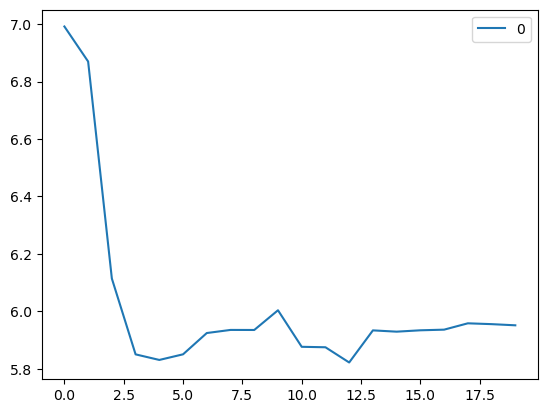

In [96]:
curve=pd.DataFrame(rmse_val)
curve.plot()

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

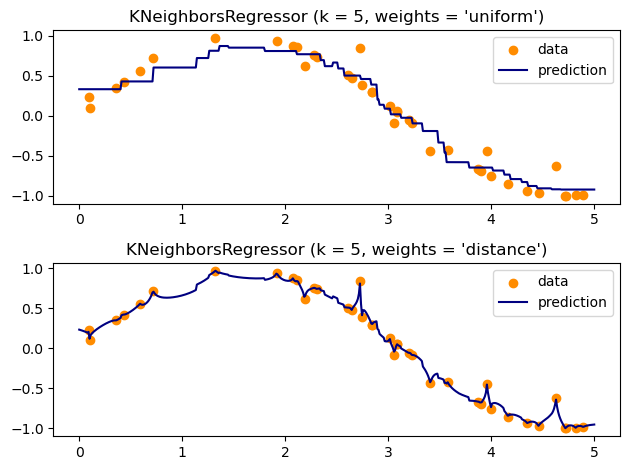

In [98]:
n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

In [111]:
#민코프스키 거리 
rmse_val =[]
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K,weights='distance',p=1)
    model.fit(X_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value k',K,'=',error)
print('가장최소 rmse',min(rmse_val), '가장 최소 k', rmse_val.index(min(rmse_val)))

RMSE value k 1 = 7.088875571114583
RMSE value k 2 = 6.952094520653148
RMSE value k 3 = 6.09066804637855
RMSE value k 4 = 5.921846337175839
RMSE value k 5 = 5.893434944702748
RMSE value k 6 = 5.923511092613458
RMSE value k 7 = 5.6424780416971165
RMSE value k 8 = 5.720644771218083
RMSE value k 9 = 5.7204872817759815
RMSE value k 10 = 5.720395223716545
RMSE value k 11 = 5.717062272923566
RMSE value k 12 = 5.706549210424985
RMSE value k 13 = 5.642274460583208
RMSE value k 14 = 5.676314880537827
RMSE value k 15 = 5.697053238035604
RMSE value k 16 = 5.733177803195962
RMSE value k 17 = 5.723575030704102
RMSE value k 18 = 5.717843215710261
RMSE value k 19 = 5.754410743368379
RMSE value k 20 = 5.721638669387607
가장최소 rmse 5.642274460583208 가장 최소 k 12


In [108]:
#유클리디안 거리
for K in range(20):
    K=K+1
    model=neighbors.KNeighborsRegressor(n_neighbors=K, weights='distance', p=2)
    model.fit(X_train, y_train)
    pred=model.predict(x_test)
    error=np.sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print('RMSE value k', K ,'=', error)
print('가장최소 rmse',min(rmse_val), '가장 최소 k', rmse_val.index(min(rmse_val)))

RMSE value k 1 = 6.991858009955047
RMSE value k 2 = 6.869837381479873
RMSE value k 3 = 6.114052791763315
RMSE value k 4 = 5.850022581156442
RMSE value k 5 = 5.830589679279124
RMSE value k 6 = 5.850181445122961
RMSE value k 7 = 5.9242975166427305
RMSE value k 8 = 5.935116361222229
RMSE value k 9 = 5.93493535387701
RMSE value k 10 = 6.003583060302957
RMSE value k 11 = 5.876335237299137
RMSE value k 12 = 5.874752700110766
RMSE value k 13 = 5.821763081956603
RMSE value k 14 = 5.9335516823911645
RMSE value k 15 = 5.929063239071093
RMSE value k 16 = 5.933828295617679
RMSE value k 17 = 5.936065074458213
RMSE value k 18 = 5.95815263765007
RMSE value k 19 = 5.955261705404557
RMSE value k 20 = 5.951202238169891
가장최소 rmse 5.642274460583208 가장 최소 k 12


In [110]:
#쳬비셰프거리
for K in range(20):
    K=K+1
    model=neighbors.KNeighborsRegressor(n_neighbors=K, weights='distance', p=3)
    model.fit(X_train, y_train)
    pred=model.predict(x_test)
    error=np.sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print('RMSE value k', K ,'=', error)
print('가장최소 rmse',min(rmse_val), '가장 최소 k', rmse_val.index(min(rmse_val)))

RMSE value k 1 = 7.009552305918814
RMSE value k 2 = 7.142547661002891
RMSE value k 3 = 6.397339647281669
RMSE value k 4 = 6.002315394209467
RMSE value k 5 = 6.058378442619284
RMSE value k 6 = 5.9808092551211285
RMSE value k 7 = 6.060504276824615
RMSE value k 8 = 6.053273377690282
RMSE value k 9 = 6.04538005679971
RMSE value k 10 = 5.999649653667621
RMSE value k 11 = 5.9831952762351435
RMSE value k 12 = 5.952448056321488
RMSE value k 13 = 6.012416138154727
RMSE value k 14 = 6.107474255480143
RMSE value k 15 = 6.090300846894213
RMSE value k 16 = 6.0363584245938
RMSE value k 17 = 5.9604073980572405
RMSE value k 18 = 5.937586796848331
RMSE value k 19 = 5.960521703210644
RMSE value k 20 = 5.99553112515514
가장최소 rmse 5.642274460583208 가장 최소 k 12


# RadiusNeighborsRegressor(radius=K)
- 고정된 반지름의 길이를 지정하여 그 기반으로 근접이웃을 설정하여 값을 계산한다.